In [14]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from skfuzzy.cluster import cmeans as FCM
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import confusion_matrix, accuracy_score
import sys
import os

# Add the parent directory to sys.path so 'src' can be imported
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [15]:
# Import Functions
from src.data_preprocessing import load_dataset
from src.fcm_model import select_features, standardize_features, fuzzy_c_means, plot_fcm_clusters_2d, evaluate_clustering, plot_confusion_matrix

In [16]:
# Import Dataset
df = load_dataset('D:\Data Rafdhi\Programming\Programming Project (Git)\FuzzyCMeans-Palmer-Penguins\data\cleaned_penguins.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [17]:
# Select Features
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = select_features(df, features)

In [18]:
# Standardize Features
X = standardize_features(X)

In [19]:
# FCM Model
fcm = fuzzy_c_means(X, n_clusters=3, m=2.0, error=0.005, max_iter=1000)

In [20]:
# Cluster Labels
cluster_labels = np.argmax(fcm[0], axis=0)

In [21]:
# Centers
cntr = fcm[1]
print("Cluster Centers:\n", cntr)

Cluster Centers:
 [[9.99814523e-01 6.15759003e-07 8.58170790e-02 7.03252500e-02]
 [1.44555537e-04 5.06543892e-07 8.95725533e-01 9.10442489e-01]
 [4.09217529e-05 9.99998878e-01 1.84573875e-02 1.92322609e-02]]


In [ ]:
# # Save model
# np.save('fcm_cluster_centers.npy', cntr)

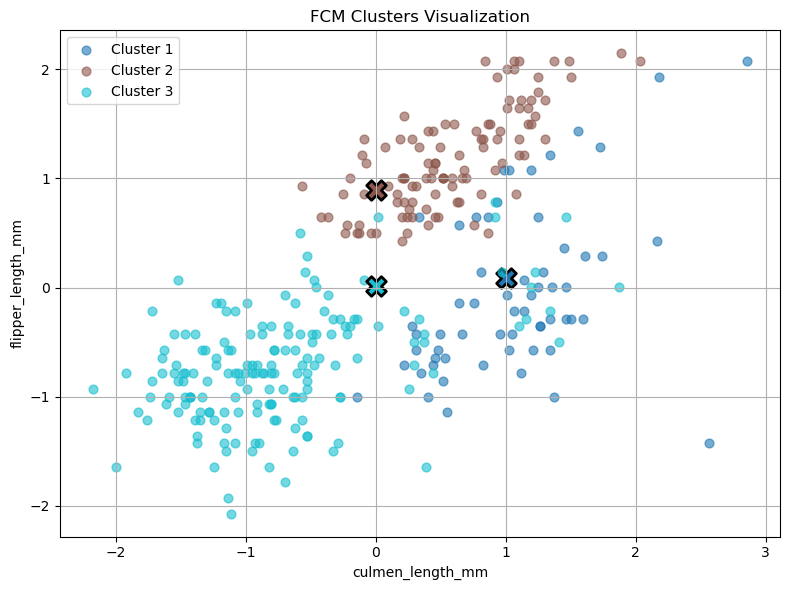

In [23]:
# Plot FCM Clusters
# Select only the relevant columns for cluster centers
plot_fcm_clusters_2d(X, cluster_labels, cntr, x_col='culmen_length_mm', y_col='flipper_length_mm')

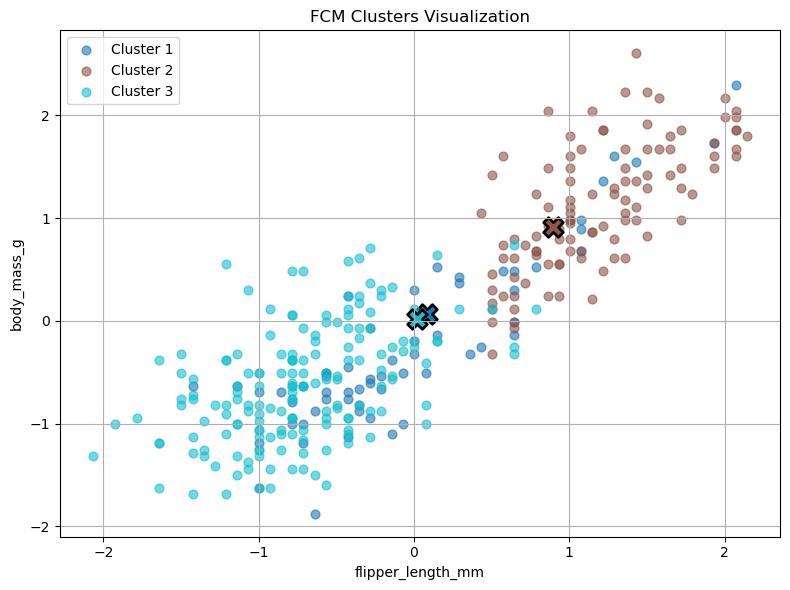

In [24]:
# Plot FCM Clusters
# Select only the relevant columns for cluster centers
plot_fcm_clusters_2d(X, cluster_labels, cntr, x_col='flipper_length_mm', y_col='body_mass_g')

In [25]:
# Model Evaluation
evaluate_clustering(X, cluster_labels, cntr)

{'silhouette_score': 0.3673420510376939,
 'davies_bouldin_score': 1.1573511507913983}

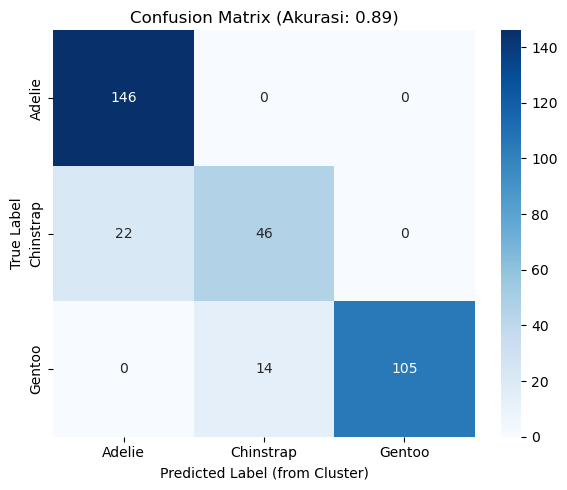

0.8918918918918919

In [26]:
# Confusion Matrix
plot_confusion_matrix(df['species'], cluster_labels)